# Cat 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('Data/TGAS_d125_Wright03_2Mass.vot', format='votable')

#print(t)

In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'angDist', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


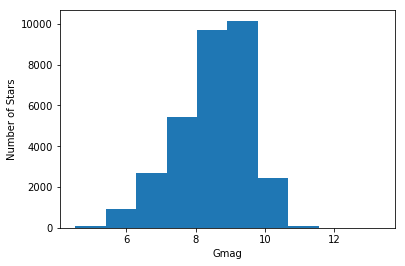

In [4]:
#Histogram of G band magnitudes
Gmag = t['__Gmag_']
plt.hist(Gmag)
plt.xlabel('Gmag')
plt.ylabel('Number of Stars')

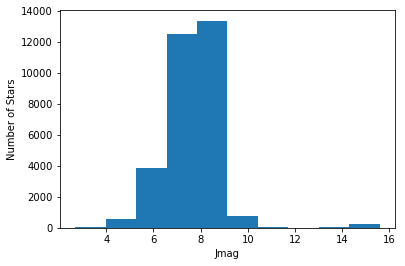

In [5]:
#Histogram of J band magnitudes
Jmag = t['Jmag']
plt.hist(Jmag)
plt.xlabel('Jmag')
plt.ylabel('Number of Stars')

ValueError: max must be larger than min in range parameter.

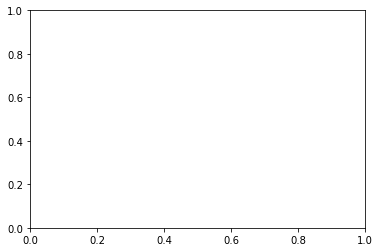

In [13]:
#Histogram of K band magnitudes
Kmag = t['Kmag']
plt.hist(Kmag)
plt.xlabel('Kmag')
plt.ylabel('Number of Stars')

In [15]:
#calculate distances and store them in table column
plx = t['Plx']
d_data = np.zeros(len(plx))
for i in range(len(d_data)):
    d_data[i] = 1/(plx[i]/1000)
d = Table.Column(data=d_data, name='d')
t.add_column(d)

In [16]:
#Calculate absolute magnitudes and store them in table column
Abs_mag_data = np.zeros(len(d))
for i in range(len(Abs_mag_data)):
    #Gmag is taken as apparent magnitude
    Abs_mag_data[i] = Gmag[i] - 5*math.log10(d[i]/10)
Abs_mag = Table.Column(data=Abs_mag_data, name='Abs_mag')
t.add_column(Abs_mag)

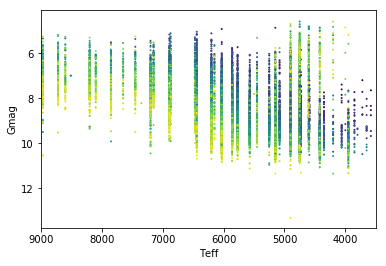

In [19]:
#H-R diagram (with apparent magnitude)
Teff = t['Teff']
plt.xlim(3500,9000)
plt.scatter(Teff, Gmag,c=d,s=1.0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('Gmag')

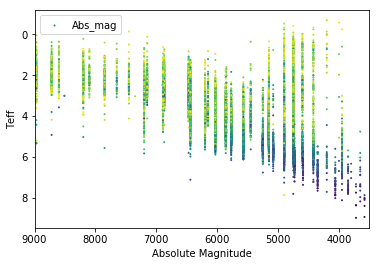

In [20]:
#H-R diagram (with absolute magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff,Abs_mag,c=d,s=1.0)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Teff')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend()